In [7]:
import  pandas as pd
import seaborn as sns

In [24]:
#carga de datos , desde directorio origen dataset
cash_df = pd.read_csv("./project_dataset/extract-cash-request-data-analyst.csv")
fees_df = pd.read_csv("./project_dataset/extract-fees-data-analyst.csv")
cash = cash_df.copy()
fees = fees_df.copy()

In [16]:
#informacion general de tipos de datos y cantidad de resgistros por columna
cash_df.info()
cash_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [11]:
fees_df.info()
fees_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


##preprocesamiento : Analisis inicial

como primeros hallazgos encontramos 4 columnas principales, sin valores nulos que son:
numeros de registros totales para cash_df = 23970
numeros de registros totales para fees_df = 21061

cash_df variables : [id , amount ,status , created_at , updated_ad , (user_id u deleted_account_id)]

fees_df variables : [id, type , status, updated_at ,crated_at,charge_moment, total_amount]
identificando variable created_at y updated_at que son fechas, como referencia para creacion de cohortes.

In [5]:
#total nulos por columna
cash_df.isnull().sum()

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64

<Axes: >

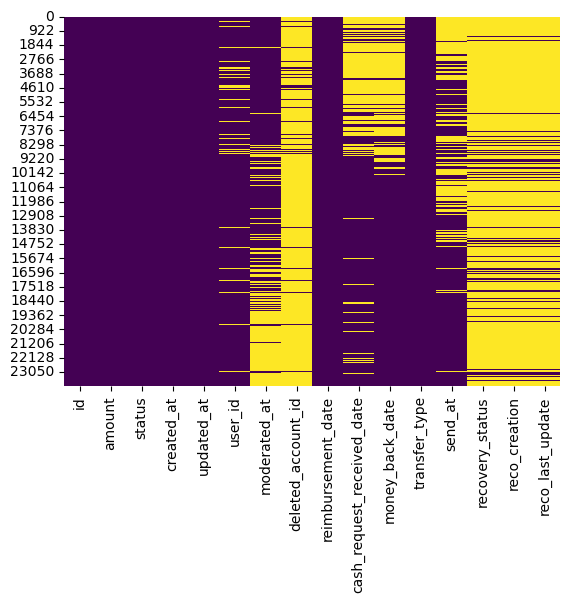

In [10]:
#mapa de calor de valores nulos o faltantes

sns.heatmap(cash_df.isnull(), cbar=False, cmap='viridis')

## Preprocesamiento tipos de datos
en nuestro caso de estudios, encontramos variables mayoritariamente fechas en diferentes  formatos , y otras variables cualitativas politomicas nominales. procederemos antes de la limpieza de datos a dar formatos adecuados para el procesamiento.

In [17]:
cash_df["created_at"]

0        2019-12-10 19:05:21.596873+00
1         2019-12-10 19:50:12.34778+00
2         2019-12-10 19:13:35.82546+00
3        2019-12-10 19:16:10.880172+00
4        2020-05-06 09:59:38.877376+00
                     ...              
23965    2020-10-12 13:54:11.686225+00
23966     2020-10-27 14:41:25.73491+00
23967    2020-10-20 07:58:04.006937+00
23968    2020-10-10 05:40:55.700422+00
23969    2020-10-08 14:16:52.155661+00
Name: created_at, Length: 23970, dtype: object

In [23]:
#tomaremos un un indice para entender la configuracion de fechas 
cash_df.iloc[14400]

id                                                    12413
amount                                                100.0
status                                           money_back
created_at                    2020-08-14 00:46:13.010822+00
updated_at                    2020-12-18 13:10:09.557056+00
user_id                                             11318.0
moderated_at                  2020-08-14 08:02:51.869495+00
deleted_account_id                                      NaN
reimbursement_date                   2020-09-07 22:00:00+00
cash_request_received_date                       2020-08-14
money_back_date               2020-09-09 19:51:33.705958+00
transfer_type                                       instant
send_at                       2020-08-21 00:46:12.957617+00
recovery_status                                         NaN
reco_creation                                           NaN
reco_last_update                                        NaN
Name: 14400, dtype: object

In [29]:
fees_df.iloc[14400]

id                                              17930
cash_request_id                               24724.0
type                                  instant_payment
status                                       accepted
category                                          NaN
total_amount                                      5.0
reason             Instant Payment Cash Request 24724
created_at              2020-10-26 16:47:44.417815+00
updated_at              2020-10-26 16:47:44.417847+00
paid_at                 2020-11-09 19:28:05.545693+00
from_date                                         NaN
to_date                                           NaN
charge_moment                                   after
Name: 14400, dtype: object

encontrmos strings relacionados con fechas, se procede a identificar formatos y adecuarlos a un formato comun conveniente para el analisis.
previo a esto crearemos copia de los archivos cargados, para no modificar los originales a los cuales llamaremos , cash y fees [creados en linea 1 de codigo la copia de los datos].

In [31]:
fees[["created_at", "updated_at", "paid_at", "from_date", "to_date"]] = \
fees[["created_at", "updated_at", "paid_at", "from_date", "to_date"]].apply(pd.to_datetime, format="ISO8601")
cash[["created_at", "updated_at", "moderated_at", "reimbursement_date", "cash_request_received_date","money_back_date", "send_at"]] = \
    cash[["created_at", "updated_at", "moderated_at", "reimbursement_date", "cash_request_received_date", "money_back_date", "send_at"]].apply(pd.to_datetime, format="ISO8601")

In [33]:
cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  datetime64[ns, UTC]
 5   user_id                     21867 non-null  float64            
 6   moderated_at                16035 non-null  datetime64[ns, UTC]
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          23970 non-null  datetime64[ns, UTC]
 9   cash_request_received_date  16289 non-null  datetime64[ns]     
 10  money_back_date             16543 non-null  datetime64[ns,

In [34]:
fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               21061 non-null  int64              
 1   cash_request_id  21057 non-null  float64            
 2   type             21061 non-null  object             
 3   status           21061 non-null  object             
 4   category         2196 non-null   object             
 5   total_amount     21061 non-null  float64            
 6   reason           21061 non-null  object             
 7   created_at       21061 non-null  datetime64[ns, UTC]
 8   updated_at       21061 non-null  datetime64[ns, UTC]
 9   paid_at          15531 non-null  datetime64[ns, UTC]
 10  from_date        7766 non-null   datetime64[ns, UTC]
 11  to_date          7766 non-null   datetime64[ns, UTC]
 12  charge_moment    21061 non-null  object             
dtypes: datetime64[ns